In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

In [52]:
a='qwer'
b=['adsf','qwer']
a in b

True

In [1]:
import pickle

In [4]:
with open('E:/google data analyzing practice/LoanAproval Project/model/Random Forest Model.pickle', 'rb') as to_read:
    model=pickle.load(to_read)

In [48]:
import numpy as np

sample = [0,0.0, 1, 0, 5849, 0.0, 1200, 360.0, 1.0, 1]
prepared_sample = np.array(sample).reshape(1, -1)

# Now you can feed it to your model
predict = model.predict(prepared_sample)


e:\google data analyzing practice\google_practice\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
predict

array([1])

In [ ]:
clean_data=pd.read_csv('data/training_data/preprocess_data.csv')

In [3]:
y=clean_data['Loan_Status']
X=clean_data.drop(columns='Loan_Status',axis=1)

In [39]:
RFC=RandomForestClassifier(random_state=0)
# 2. Create a dictionary of hyperparameters to tune 
#==> ENTER YOUR CODE HERE
cv_params={'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [2,4],
             'min_samples_split': [4,6],
             'n_estimators': [130,140]
             }
# 3. Define a list of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
T_RFC=GridSearchCV(RFC,cv_params,scoring=scoring,refit='f1')

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=13,test_size=0.2)

In [41]:
T_RFC.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [130, 140]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [42]:
T_RFC.best_estimator_

RandomForestClassifier(max_features=1.0, max_samples=0.7, min_samples_leaf=4,
                       min_samples_split=4, n_estimators=140, random_state=0)

In [43]:
T_RFC.best_score_

np.float64(0.8709252280799644)

In [44]:
T_RFC.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 140}

In [45]:
T_RFC.best_index_

np.int64(5)

In [46]:
def training_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [47]:
training=training_results('RFC Training',T_RFC,'f1')
training

,model,precision,recall,F1,accuracy
0,RFC Training,0.799419,0.957581,0.870925,0.802037


In [48]:
y_pred=T_RFC.best_estimator_.predict(X_test)

In [49]:
def test_result(name,y_pred,y_test):

    acc=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    table = pd.DataFrame({'model': [name],
                        'precision': [prec],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [acc]
                        })

    return table

In [50]:
test=test_result('RFC Test',y_pred,y_test)
test

,model,precision,recall,F1,accuracy
0,RFC Test,0.831325,0.971831,0.896104,0.841584


In [51]:
results=pd.concat([training,test],axis=0)
results

,model,precision,recall,F1,accuracy
0,RFC Training,0.799419,0.957581,0.870925,0.802037
0,RFC Test,0.831325,0.971831,0.896104,0.841584


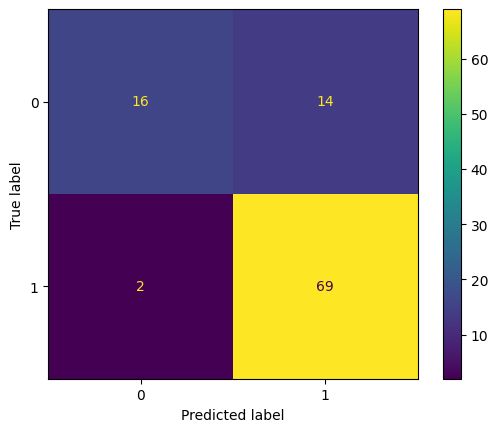

In [52]:
cm=confusion_matrix(y_test,y_pred,labels=T_RFC.classes_)
display_cm=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=T_RFC.classes_)
display_cm.plot()

In [59]:
X_test.columns

Index(['Unnamed: 0', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

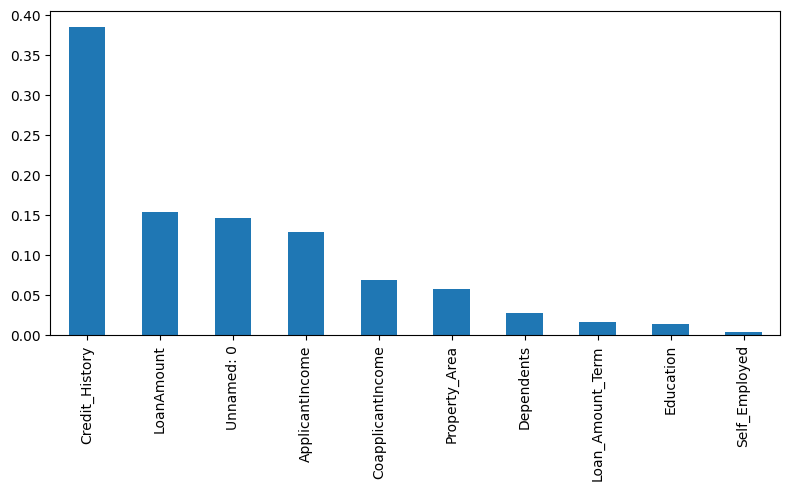

In [58]:
import matplotlib.pyplot as plt
importances = T_RFC.best_estimator_.feature_importances_
RF_importances = pd.Series(importances, index=X_test.columns)
RF_importances = RF_importances.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8,5))
RF_importances.plot.bar(ax=ax)
fig.tight_layout();